In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
charge = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
charge

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
charge.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

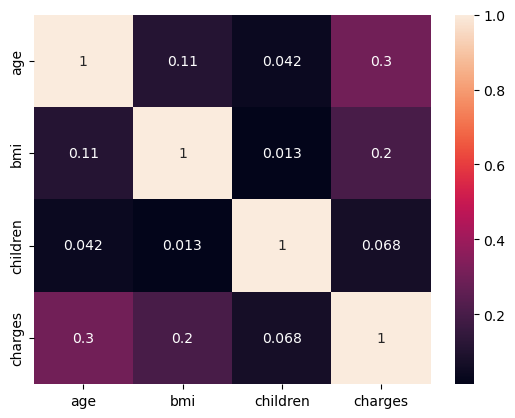

In [4]:
sns.heatmap(charge.corr(), annot=True)

In [5]:
X = charge.drop(['charges'], axis=1)
y = charge['charges']

In [6]:
sex = pd.get_dummies(X.sex, drop_first=True)
smoker = pd.get_dummies(X.smoker, drop_first=True)
region = pd.get_dummies(X.region, drop_first=True)
X1 = X.drop(['sex','smoker','region'], axis=1)

In [7]:
x = pd.concat([sex,smoker,region,X1], axis=1)
x

,male,yes,northwest,southeast,southwest,age,bmi,children
0,0,1,0,0,1,19,27.900,0
1,1,0,0,1,0,18,33.770,1
2,1,0,0,1,0,28,33.000,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.880,0
...,...,...,...,...,...,...,...,...
1333,1,0,1,0,0,50,30.970,3
1334,0,0,0,0,0,18,31.920,0
1335,0,0,0,1,0,18,36.850,0
1336,0,0,0,0,1,21,25.800,0


In [8]:
x=x.astype(int)

In [9]:
x_scaled =StandardScaler().fit_transform(x)
x_scaled1 = pd.DataFrame(x_scaled)
x_scaled1

,0,1,2,3,4,5,6,7
0,-1.010519,1.970587,-0.566418,-0.611324,1.765481,-1.438764,-0.518122,-0.908614
1,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-1.509965,0.462657,-0.078767
2,0.989591,-0.507463,-0.566418,1.635795,-0.566418,-0.797954,0.462657,1.580926
3,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.441948,-1.335438,-0.908614
4,0.989591,-0.507463,1.765481,-0.611324,-0.566418,-0.513149,-0.354659,-0.908614
...,...,...,...,...,...,...,...,...
1333,0.989591,-0.507463,1.765481,-0.611324,-0.566418,0.768473,-0.027733,1.580926
1334,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418,-1.509965,0.135731,-0.908614
1335,-1.010519,-0.507463,-0.566418,1.635795,-0.566418,-1.509965,0.953046,-0.908614
1336,-1.010519,-0.507463,-0.566418,-0.611324,1.765481,-1.296362,-0.845048,-0.908614


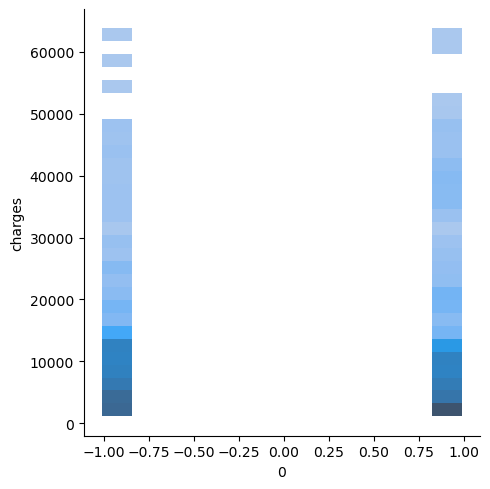

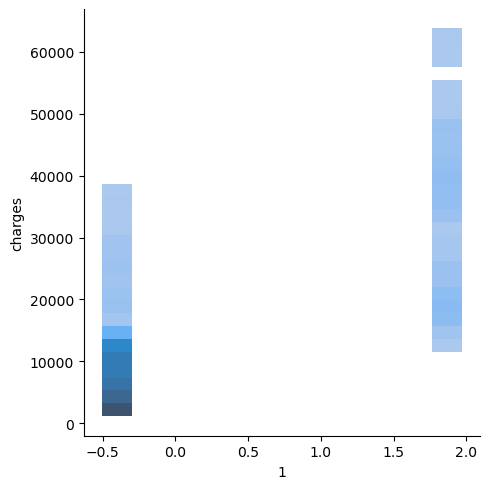

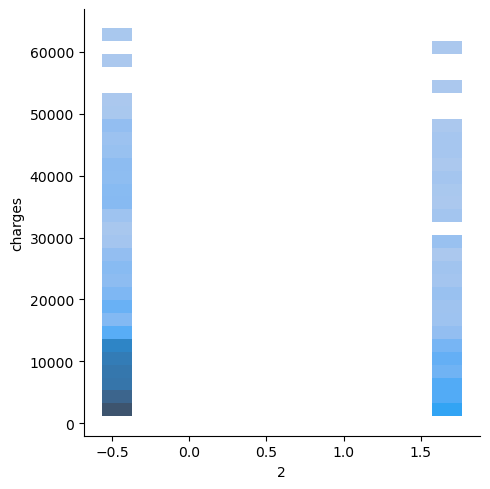

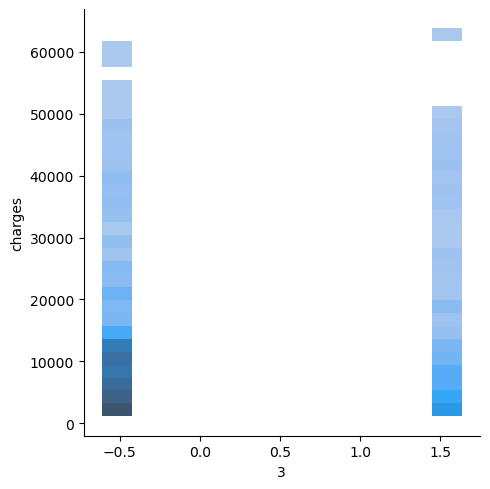

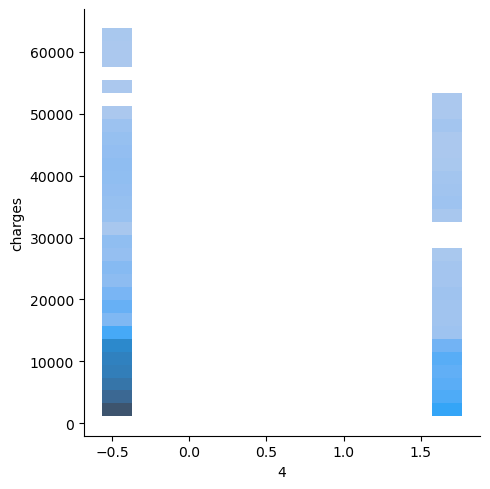

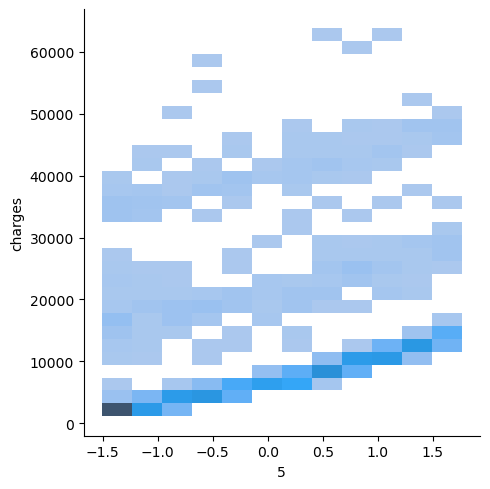

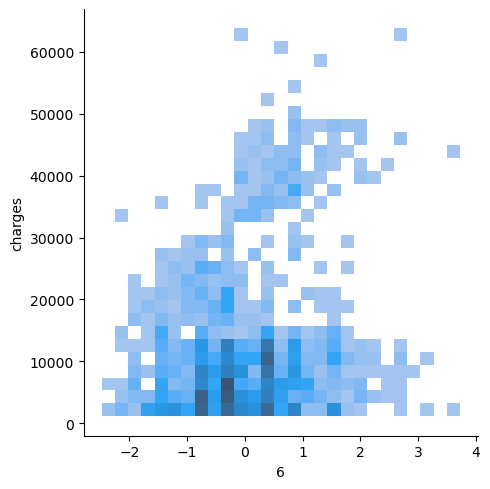

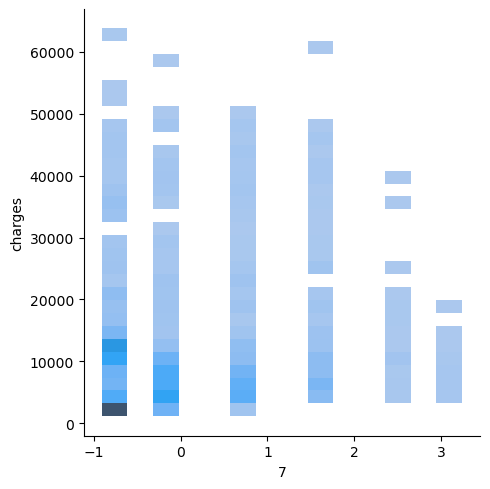

In [10]:
for i in x_scaled1.columns:
    sns.displot(data=x_scaled1, x=x_scaled1[i], y = y)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled1, y, test_size = 0.30, random_state = 42)

# Linear Regression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(x_train, y_train)

LinearRegression()

In [14]:
pred_t = lm.predict(x_train)

In [15]:
score = r2_score(pred_t, y_train)*100
score

65.28457362987238

In [16]:
pred_test = lm.predict(x_test)

In [17]:
score = r2_score(pred_test, y_test)*100
score

69.41073877962756

In [18]:
print(lm.coef_)

[  54.39770739 9538.41974204 -204.96801835 -436.01703315 -402.97288552
 3669.64148548 2126.67280211  512.08430161]


In [19]:
print(lm.intercept_)

13317.120259919397


# Random Forest Regressor

In [20]:
random = RandomForestRegressor()

In [21]:
random.fit(x_train, y_train)

RandomForestRegressor()

In [22]:
y_pred_train = random.predict(x_train)

In [23]:
score = r2_score(y_pred_train, y_train)*100
score

97.14395884281993

In [24]:
y_pred_test = random.predict(x_test)

In [25]:
score = r2_score(y_pred_test, y_test)*100
score

84.15248459231793

# after apply SelectKBest

In [46]:
# Feature Selection 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [47]:
select = SelectKBest(score_func = f_regression, k= 7)

In [48]:
select.fit(x_train, y_train)

SelectKBest(k=7, score_func=<function f_regression at 0x000001C8BFD3A430>)

In [49]:
x_tran_f = select.transform(x_train)
x_test_f = select.transform(x_test)

In [50]:
x_tran_f1=pd.DataFrame(x_tran_f)
x_test_f1=pd.DataFrame(x_test_f)

In [51]:
lm.fit(x_tran_f1, y_train)

LinearRegression()

In [52]:
y_pred_train = lm.predict(x_tran_f1)

In [33]:
score = r2_score(y_pred_train, y_train)*100
score

65.15142287142403

In [34]:
y_pred_test = lm.predict(x_test_f1)

In [53]:
score = r2_score(y_pred_test, y_test)*100
score

69.16114017775422

# random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
reandom = RandomForestRegressor()

In [38]:
reandom.fit(x_tran_f1, y_train)

RandomForestRegressor()

In [45]:
pred_t = reandom.predict(x_tran_f1)


In [40]:
score = r2_score(pred_t, y_train)*100
score

97.11755528973623

In [41]:
pred_test = reandom.predict(x_test_f1)


In [42]:
score = r2_score(pred_test, y_test)*100
score

83.75996387742227

# gradient Decent

In [43]:
def Gradient_decent(m,c,l,epochs, x, y):
    
    for i in range(epochs):
        y_pred = m *x + c
        n = float(len(x))
        new_m = (-2/n) * sum(x * (y - y_pred))
        new_c = (-2/n) * sum(y - y_pred)
        m = m - l * new_m
        c = m - 1 * new_c
        M.append(m)
        C.append(c)
        
        

        print( m, c)

In [44]:
# Iterate through the epochs
def Gradient_decent(m,c,l,epochs, x, y):
    for i in range(epochs):
        Y_pred = m*x + c
        n = float(len(x))
        error = y - Y_pred
        D_m = -(2/n) * sum(x * error)
        D_c = -(2/n) * sum(error)
        m = m - L * D_m
        c = c - L * D_c
        # Print the final parameters
        print("Final parameters:")
        print("m =", m)
        print("c =", c)